In [16]:
%run 'header.ipynb'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
ticker = 'SAPPE'
dfs = pd.read_csv('../data/siamchart/fs/2018/1/21/'+ticker+'.csv',index_col=[0])

## PLOT REVENUE/PROFIT

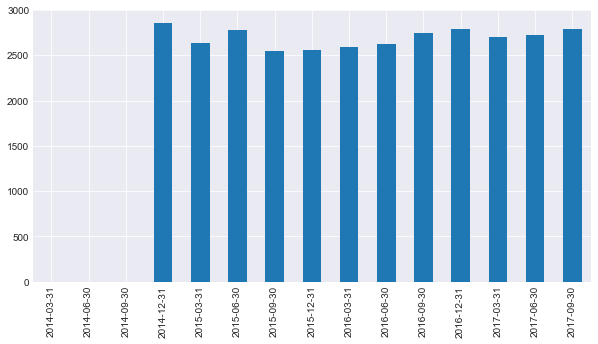

In [35]:
dfs['revenue'].rolling(window=4).sum().sort_index(ascending=True).plot(kind='bar',figsize=(10,5))

In [19]:
cols=['revenue','gross_profit','operating_profit','net_profit','eps',"number_of_shares",'cash_flow_operation','cash_flow_investment','cash_flow_financing']
dfs[cols].rolling(window=4).sum().sort_index(ascending=False)

,revenue,gross_profit,operating_profit,net_profit,eps,number_of_shares,cash_flow_operation,cash_flow_investment,cash_flow_financing
2017-09-30,2794.09,1094.50,440.05,420.79,1.389528,1212.226475,590.70,-515.41,-149.69
2017-06-30,2719.08,1095.11,422.52,402.68,1.331132,1210.822269,646.70,-287.61,-152.85
2017-03-31,2696.69,1117.58,405.64,391.11,1.296421,1208.738316,595.28,-429.46,-116.83
2016-12-31,2792.01,1188.56,418.76,410.25,1.366421,1199.167664,671.16,-276.78,-117.27
2016-09-30,2748.25,1147.05,360.98,349.99,1.167103,1198.063252,457.42,-200.82,-114.06
2016-06-30,2618.76,1100.17,331.35,314.91,1.051568,1196.654161,336.98,-208.90,-106.49
2016-03-31,2593.62,1053.38,309.36,288.34,0.961889,1197.665845,261.09,-347.57,-73.68
2015-12-31,2556.12,1022.88,330.55,300.55,1.001889,1199.139275,286.51,-444.87,-79.39
2015-09-30,2547.68,1034.32,350.40,294.40,0.994934,1163.876040,323.36,-545.64,-84.18
2015-06-30,2773.22,1100.55,380.23,326.69,1.159979,1116.134367,367.00,-728.47,-291.31


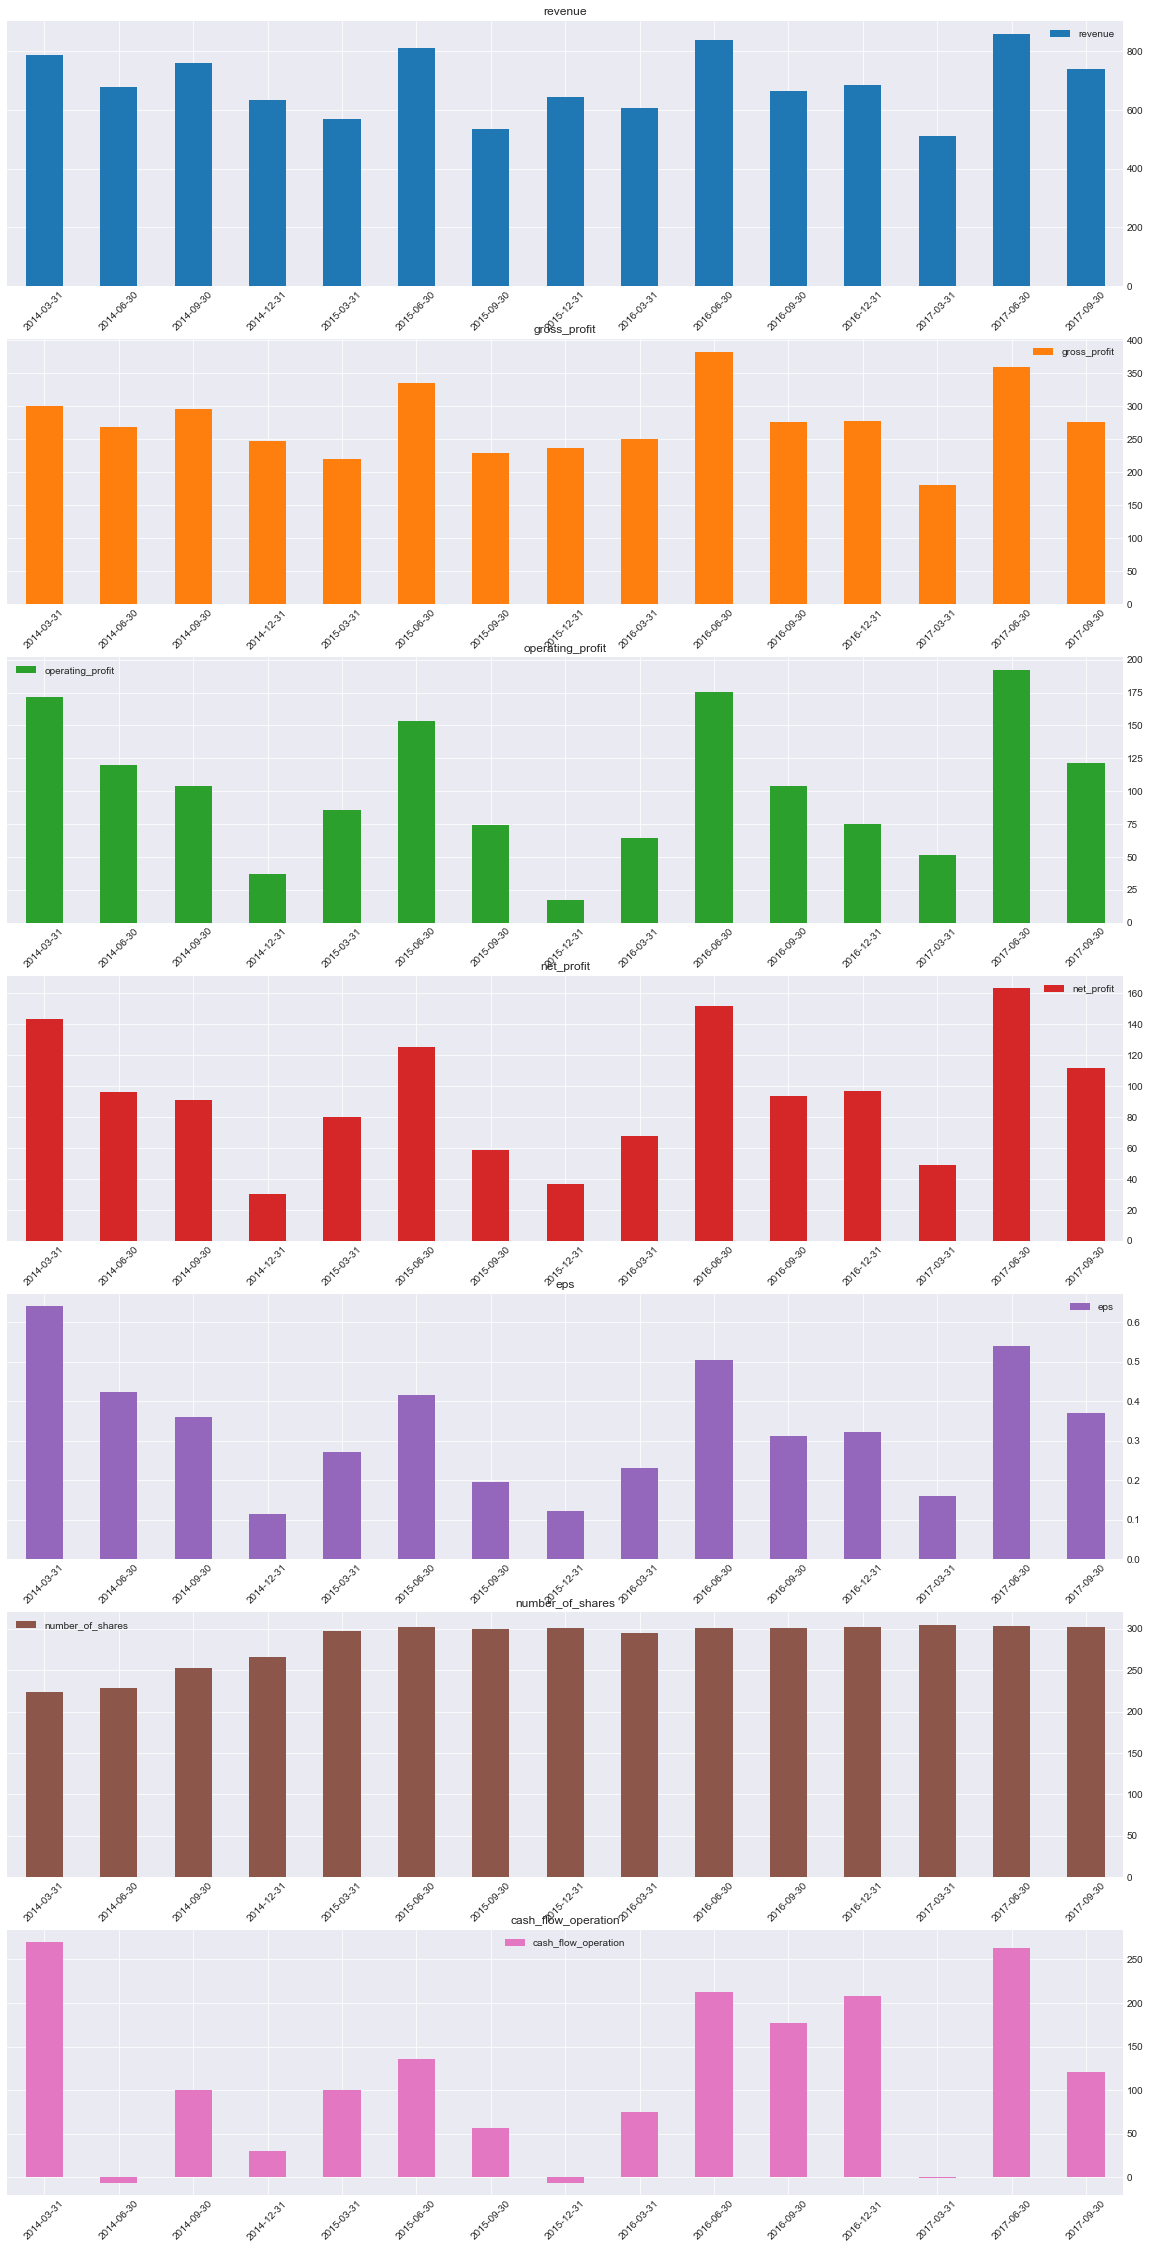

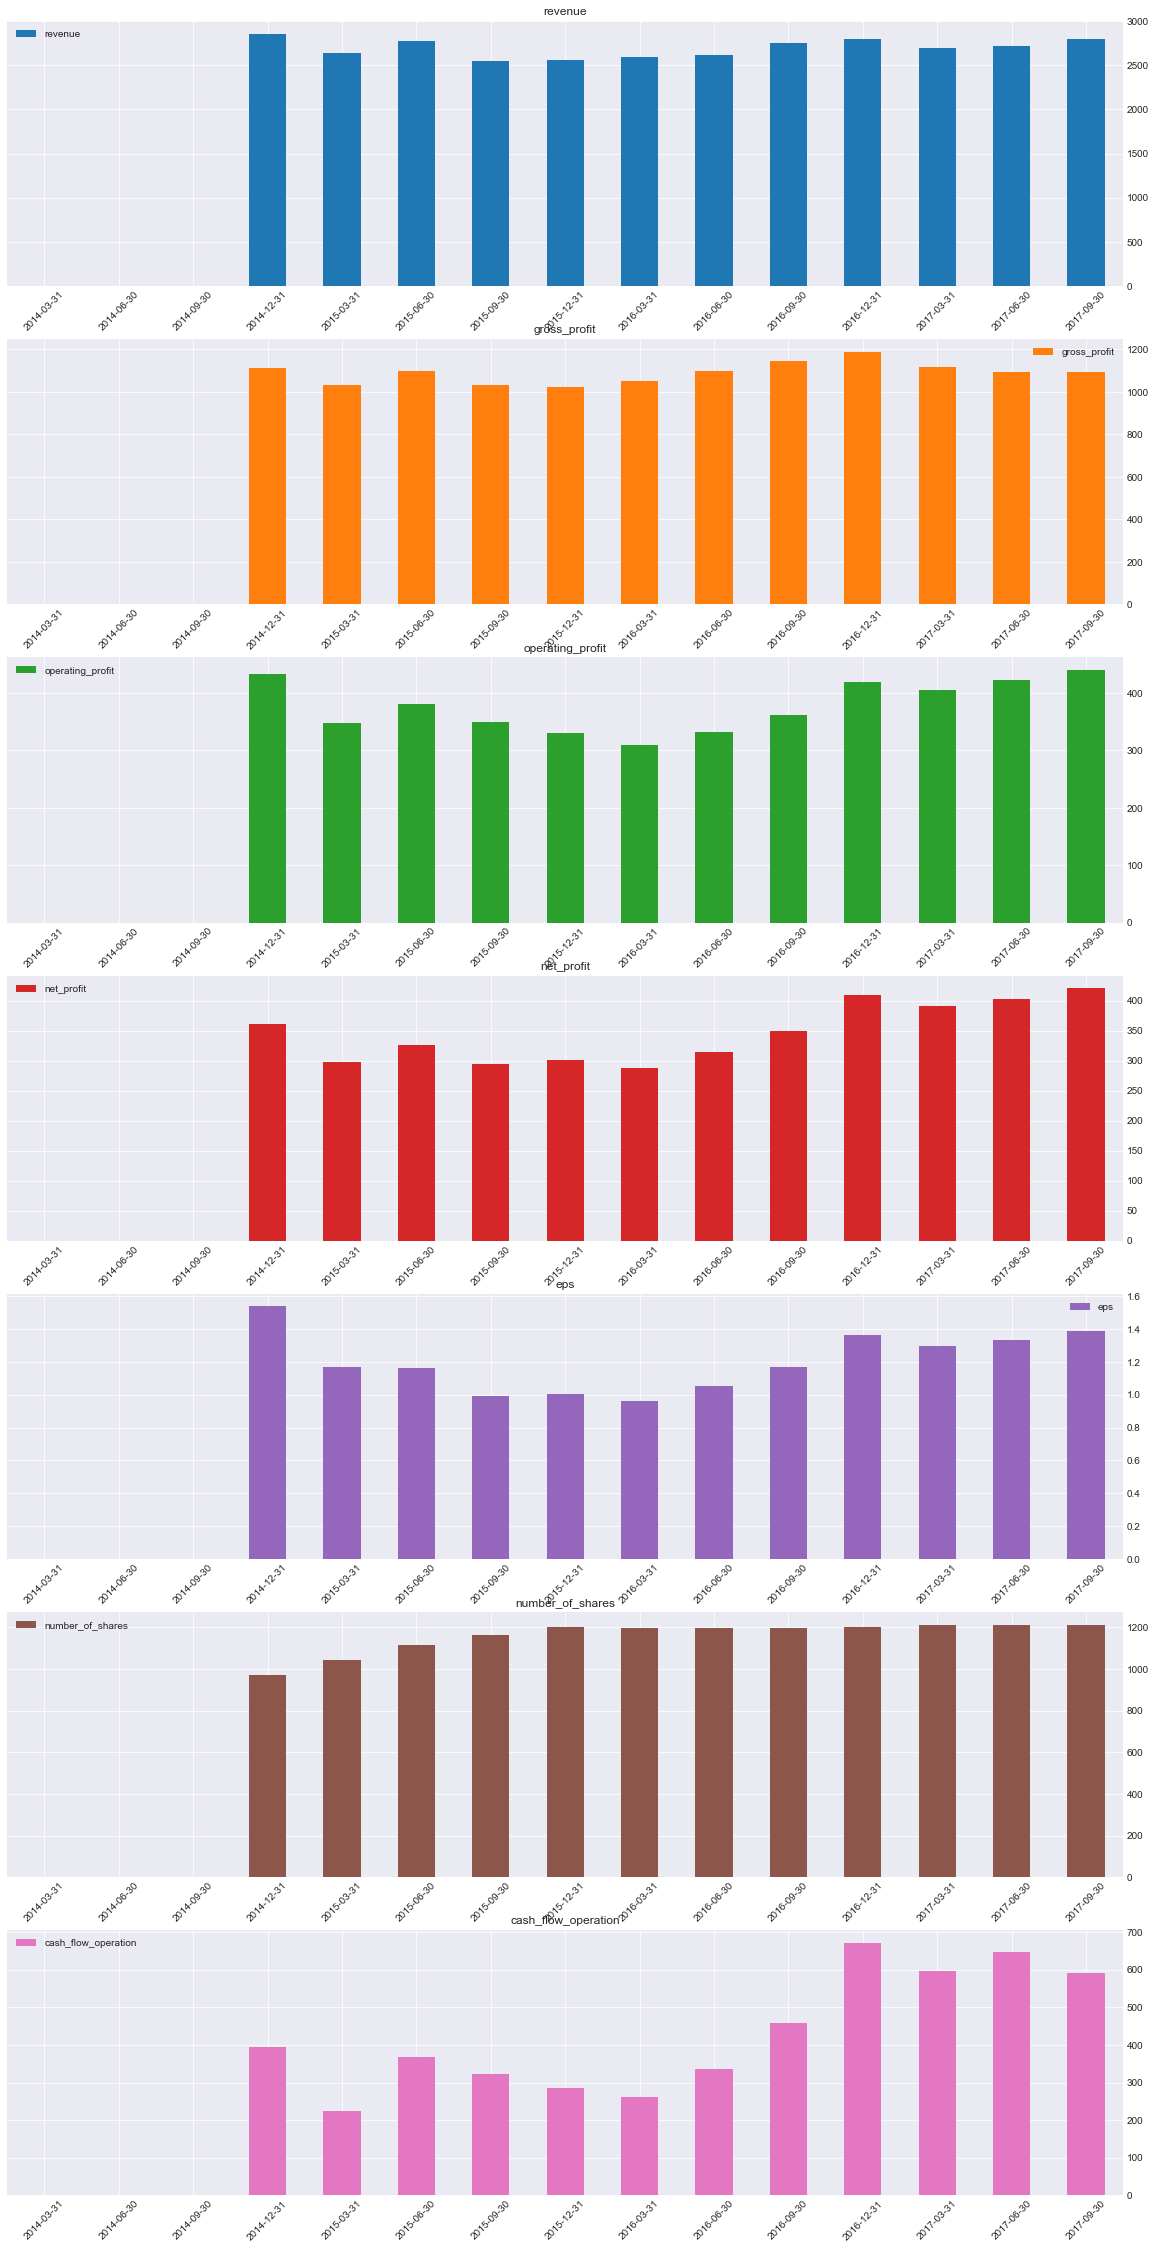

In [20]:
#plot reveue, gross profit, net profit, eps
cols=['revenue','gross_profit','operating_profit','net_profit','eps',"number_of_shares",'cash_flow_operation']
k=1
layout=(int(np.ceil(len(cols)/k)),k)
figsize=(20,40)

ax1=dfs[cols].plot(kind='bar',subplots=True,layout=layout,figsize=figsize,sharex=False)
ax2=dfs[cols].rolling(window=4).sum().plot(kind='bar',subplots=True,layout=layout,figsize=figsize,sharex=False)

set_yaxis_right = np.vectorize(lambda x: x.yaxis.tick_right())
rotate_xaxis = np.vectorize(lambda x: plt.setp(x.get_xticklabels(), rotation=45))

set_yaxis_right(ax1)
set_yaxis_right(ax2)
rotate_xaxis(ax1)
rotate_xaxis(ax2)

print('')

## Revenue, profit, cf

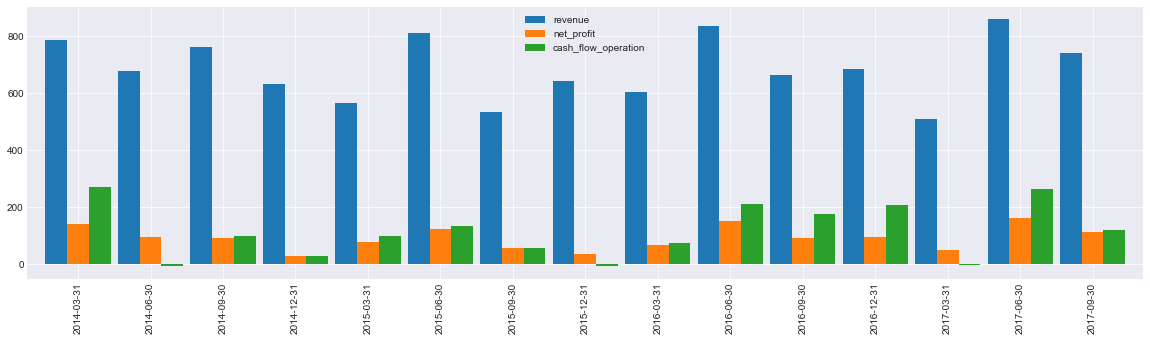

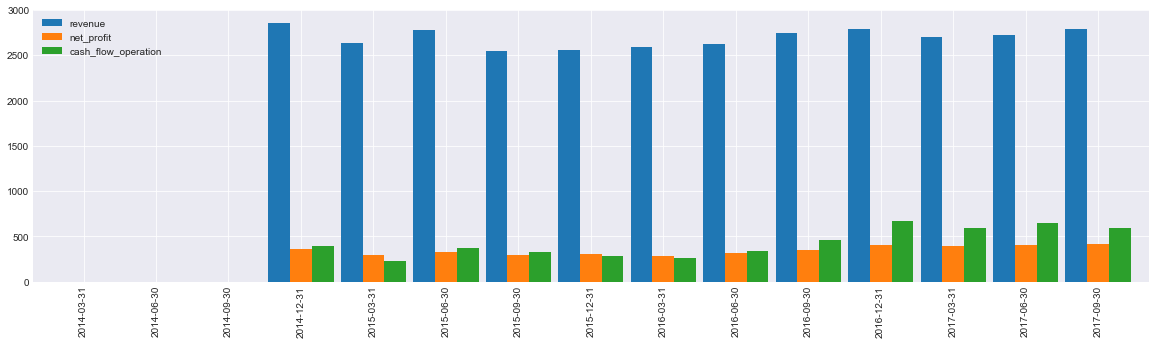

In [21]:
cols=['revenue','net_profit','cash_flow_operation']
dfs[cols].plot(kind='bar',width=0.9)
dfs[cols].rolling(window=4).sum().plot(kind='bar',width=0.9)


## GROWTH

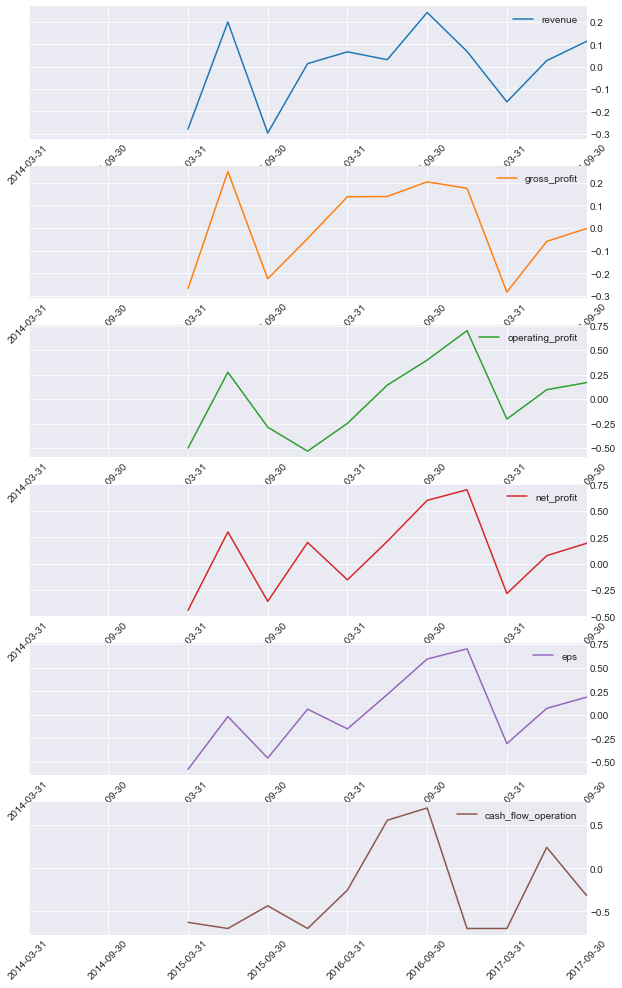

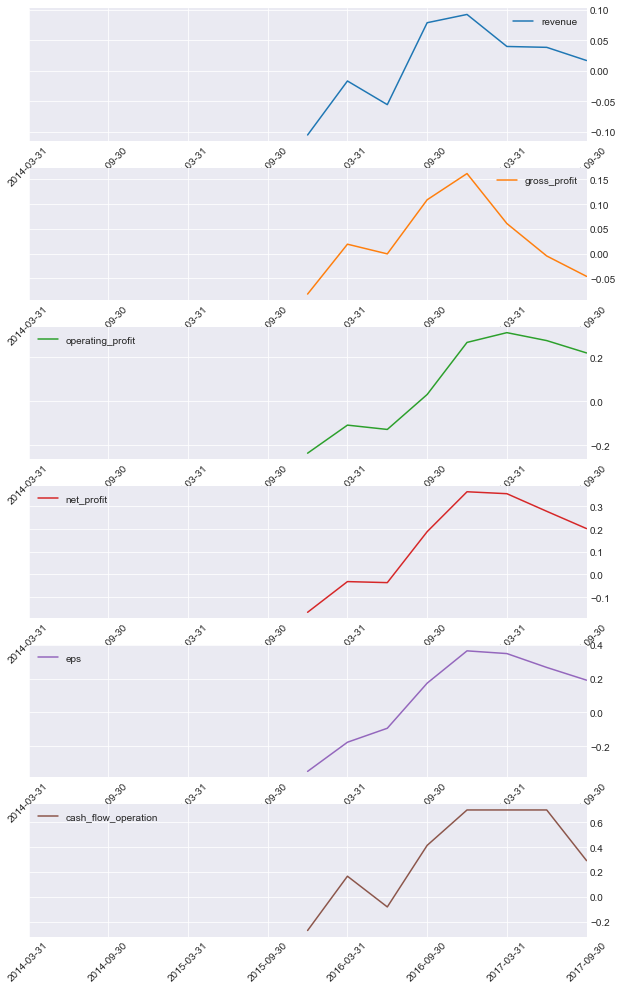

In [22]:
#plot reveue, gross profit, net profit, eps
cols=['revenue','gross_profit','operating_profit','net_profit','eps','cash_flow_operation']
clip=0.7
figsize=(10,20)

#QoQ growth
growth=dfs[cols].pct_change(periods=4)
growth_ttm=dfs[cols].rolling(window=4).sum().pct_change(periods=4)
ax1=dfs[cols].pct_change(periods=4).apply(lambda x: np.clip(x,-clip,clip)).plot(subplots=True,layout=layout,figsize=figsize,sharex=False)
#YoY growth
ax2=dfs[cols].rolling(window=4).sum().pct_change(periods=4).apply(lambda x: np.clip(x,-clip,clip)).plot(subplots=True,layout=layout,figsize=figsize,sharex=False)

set_ylim = np.vectorize(lambda x: x.set_ylim(-0.2,0.6))

set_yaxis_right(ax1)
set_yaxis_right(ax2)
#set_ylim(ax1)
#set_ylim(ax2)
rotate_xaxis(ax1)
rotate_xaxis(ax2)

print("")

## PLOT MARGIN

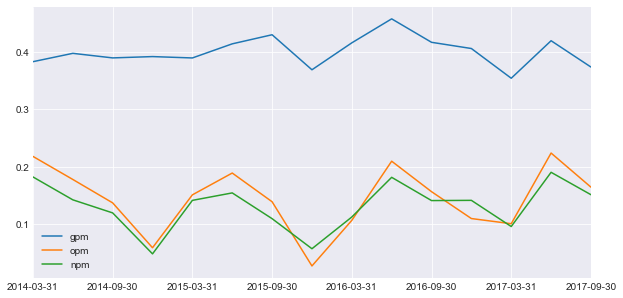

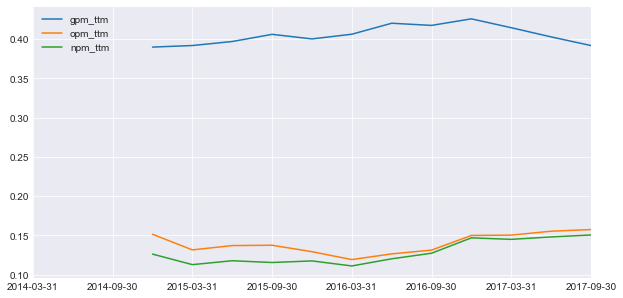

In [34]:
#margin
dfs['gpm']=dfs['gross_profit']/dfs['revenue']
dfs['opm']=dfs['operating_profit']/dfs['revenue']
dfs['npm']=dfs['net_profit']/dfs['revenue']
dfs['gpm_ttm']=dfs['gross_profit'].rolling(window=4).sum()/dfs['revenue'].rolling(window=4).sum()
dfs['opm_ttm']=dfs['operating_profit'].rolling(window=4).sum()/dfs['revenue'].rolling(window=4).sum()
dfs['npm_ttm']=dfs['net_profit'].rolling(window=4).sum()/dfs['revenue'].rolling(window=4).sum()

dfs[['gpm','opm','npm']].apply(lambda x: np.clip(x,-1,1)).plot(figsize=(10,5))
dfs[['gpm_ttm','opm_ttm','npm_ttm']].apply(lambda x: np.clip(x,-1,1)).plot(figsize=(10,5))

## PLOT CASHFLOW and  DIVIDEND

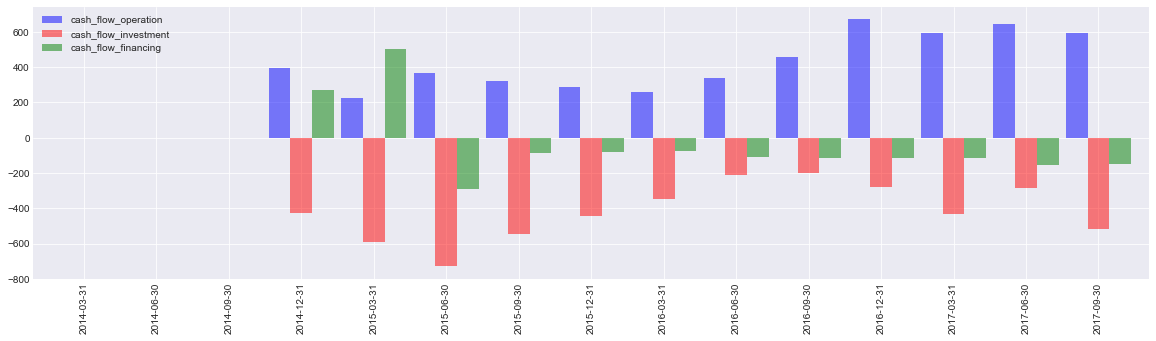

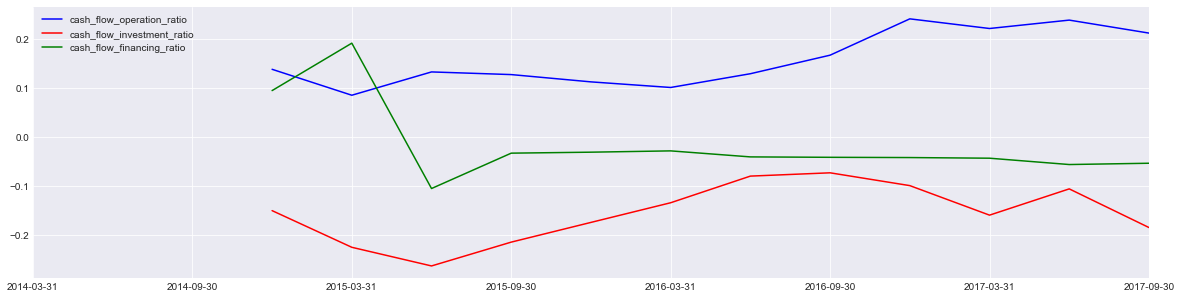

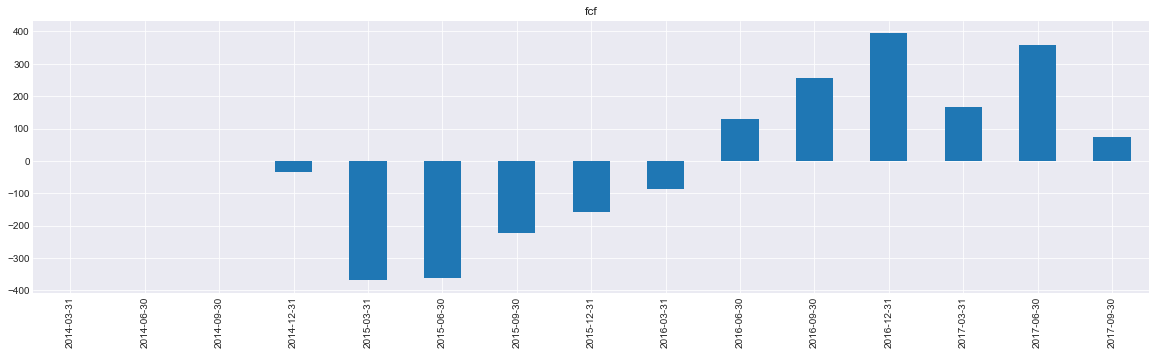

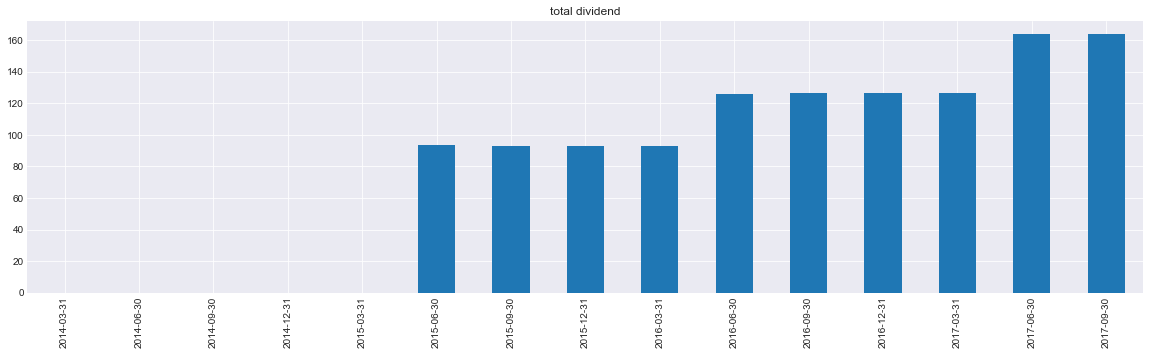

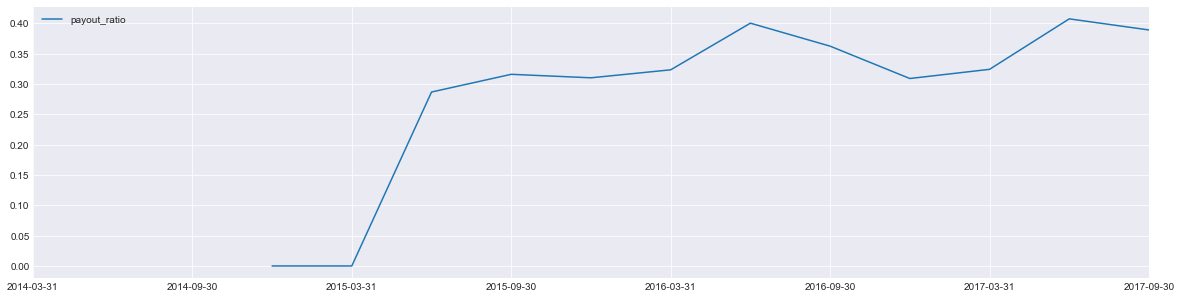

In [24]:
#cash flow all three
cols=['cash_flow_operation','cash_flow_investment','cash_flow_financing']
colors=['b','r','g']
wd=4

#ax=dfs[cols].rolling(window=4).sum().plot(kind='barh',figsize=(20,int(len(dfs)/2.0)))
#ax.xaxis.tick_top()

dfs[cols].rolling(window=wd).sum().plot(kind='bar',alpha=0.5,color=colors,label=cols,width=0.9)
# for i in range(len(cols)):
#     dfs[cols[i]].rolling(window=wd).sum().plot(kind='bar',alpha=0.5,color=colors[i],label=cols[i])
plt.legend()


#plot investment ratio
plt.figure()
for i in range(len(cols)):
    col=cols[i]
    dfs[col+'_ratio']=dfs[col].rolling(window=wd).sum()/dfs['revenue'].rolling(window=wd).sum()
dfs[[c+'_ratio' for c in cols]].plot(color=colors)

#plot dividend per cashflow generate
plt.figure()
plt.title('fcf')
dfs['free_cash_flow']=(dfs['cash_flow_operation']+dfs['cash_flow_investment'])
dfs['free_cash_flow'].rolling(window=wd).sum().plot(kind='bar')

#plot dividend per cashflow generate
plt.figure()
plt.title('total dividend')
dfs['dividend'].rolling(window=wd).sum().plot(kind='bar')

plt.figure()
dfs['div_per_cf']=dfs['dividend'].rolling(window=wd).sum()/dfs['cash_flow_operation'].rolling(window=wd).sum()
dfs['payout_ratio']=dfs['dividend'].rolling(window=wd).sum()/dfs['net_profit'].rolling(window=wd).sum()
dfs[['payout_ratio']].plot()

## PLOT ROE,ROA,ROIC

## LIQUIDITY RATIO

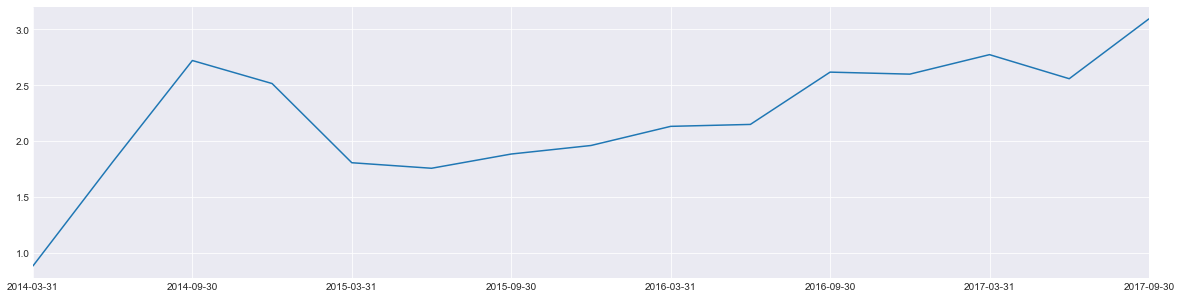

In [25]:
#liquidty

#current ratio
dfs['current_ratio']=dfs['current_asset']/dfs['current_liability']
dfs['current_ratio'].plot()

## INVENTORY AND RECEIVABLE PER SALE

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20939ba8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x116cb8b70>], dtype=object)

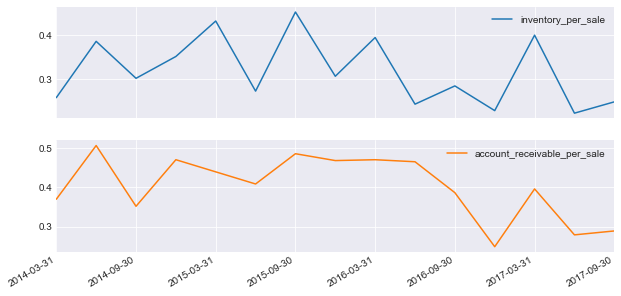

In [30]:
dfs['inventory_per_sale']=dfs['inventory']/dfs['revenue']
dfs['account_receivable_per_sale']=dfs['account_receivable']/dfs['revenue']

dfs[['inventory_per_sale','account_receivable_per_sale']].plot(subplots=True,figsize=(10,5))

## DEBT AND REPAY ABILITY

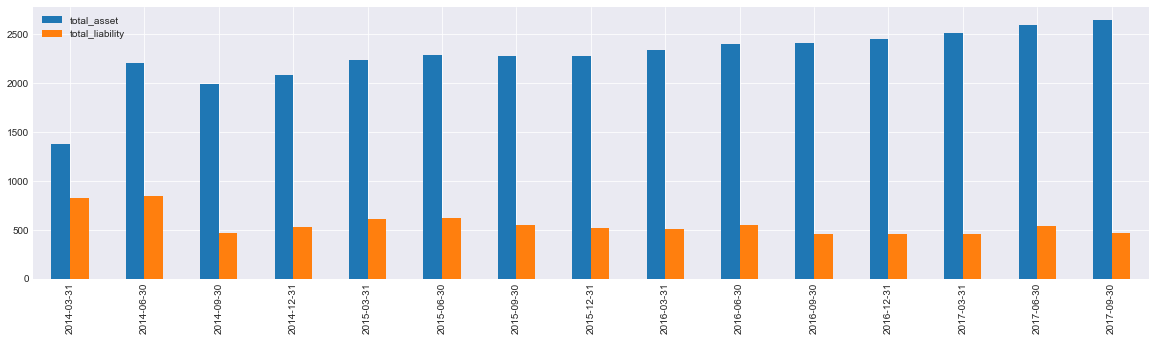

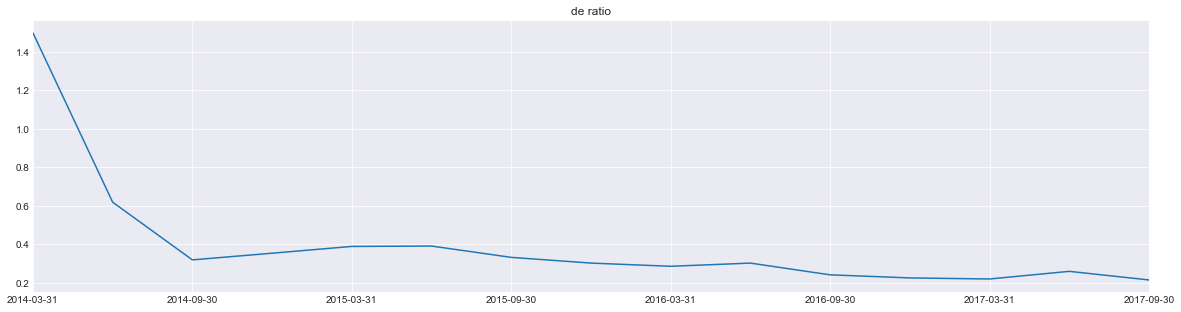

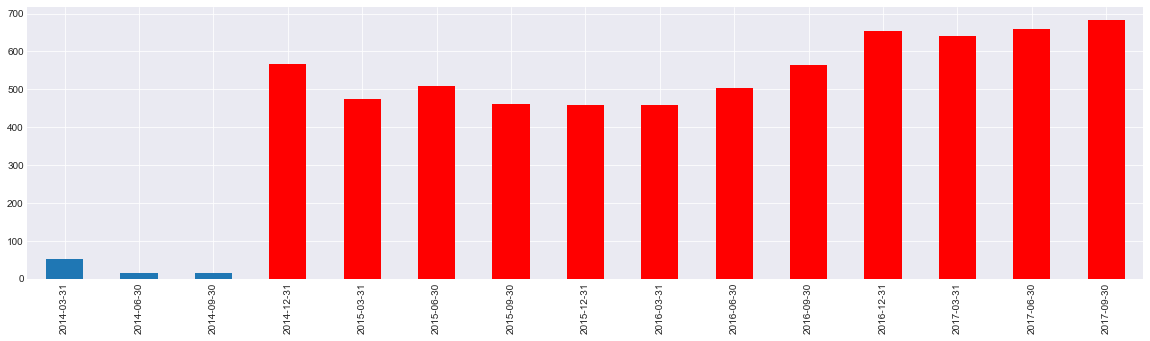

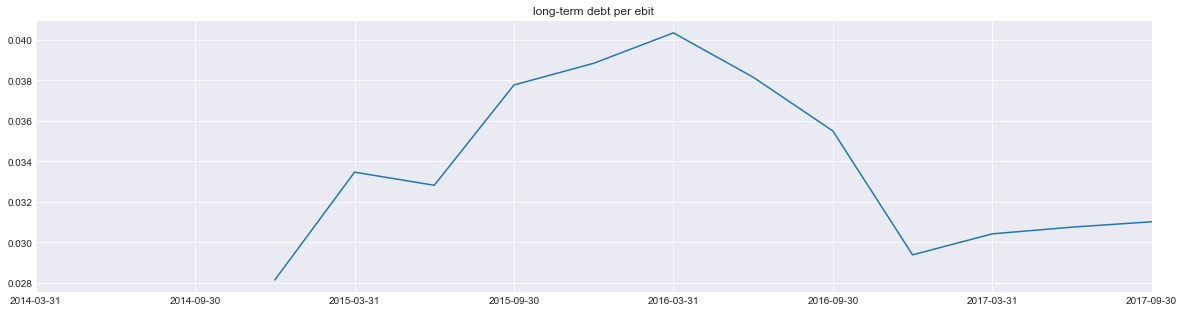

In [27]:
#debt, health
dfs[['total_asset','total_liability']].plot(kind='bar')
plt.figure()
dfs['de_ratio']=dfs['total_liability']/dfs['total_equity']
dfs['de_ratio'].plot(title='de ratio')
plt.figure()
dfs['non_current_liability'].plot(kind='bar')
dfs['ebitda'].rolling(window=4).sum().plot(kind='bar',color='red')
plt.figure()
plt.title('long-term debt per ebit')
dfs['lt_per_ebit']=(dfs['non_current_liability']/dfs['ebitda'].rolling(window=4).sum())
dfs['lt_per_ebit'].apply(lambda x: np.clip(x,-20,20)).plot()

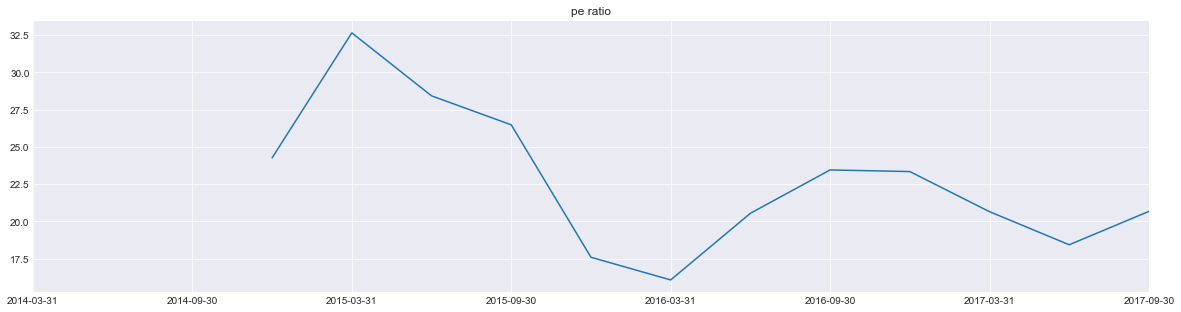

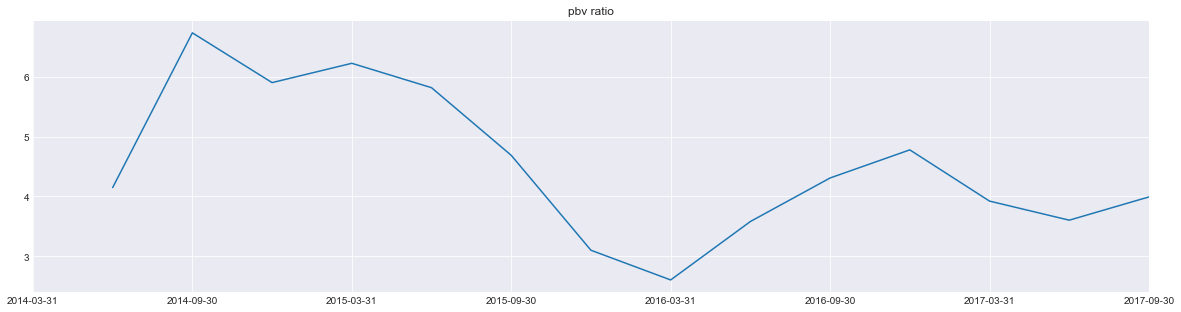

In [28]:
dfs['pe_ratio']=(dfs['close_price']*dfs['number_of_shares'])/dfs['net_profit'].rolling(window=4).sum()
dfs['pbv_ratio']=dfs['close_price']/dfs['total_equity']*dfs['number_of_shares']

plt.figure()
plt.title('pe ratio')
dfs['pe_ratio'].apply(lambda x: np.clip(x,-50,50)).plot()

plt.figure()
plt.title('pbv ratio')
dfs['pbv_ratio'].plot()